<a href="https://colab.research.google.com/github/Kristianto210/Enose-1DCNN/blob/main/Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import keras
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from keras.layers.convolutional import MaxPooling1D
from keras.utils import np_utils
from keras import callbacks
from tensorflow.keras.optimizers import SGD, Adam
from matplotlib import pyplot as plt
from keras import models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import os
from tensorflow.keras import regularizers

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QyhO_1cD2TXS7Y1DtZPgQjX7sGPBIKbT' -O enose10.zip

--2023-05-31 04:13:05--  https://docs.google.com/uc?export=download&id=1QyhO_1cD2TXS7Y1DtZPgQjX7sGPBIKbT
Resolving docs.google.com (docs.google.com)... 74.125.26.138, 74.125.26.139, 74.125.26.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.26.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i4u9dj974i05mac9g24a5ch6fp6k1olg/1685506350000/01020758249404764180/*/1QyhO_1cD2TXS7Y1DtZPgQjX7sGPBIKbT?e=download&uuid=e3440ddf-fc9f-4509-a03e-819bf14bbb5f [following]
--2023-05-31 04:13:07--  https://doc-0o-6s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i4u9dj974i05mac9g24a5ch6fp6k1olg/1685506350000/01020758249404764180/*/1QyhO_1cD2TXS7Y1DtZPgQjX7sGPBIKbT?e=download&uuid=e3440ddf-fc9f-4509-a03e-819bf14bbb5f
Resolving doc-0o-6s-docs.googleusercontent.com (doc-0o-6s-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c

In [ ]:
!unzip enose10.zip

Archive:  enose10.zip
replace databaru1/KW-1/kw1-1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
path = 'databaru1'

In [ ]:
def enose_files(path):
    '''
    Fungsi untuk ngelist semua files yang ada di path
    expectasi struktur folder
    --FOLDER
     --KW-1-> file1.csv
     --KW-2-> file2.csv
     --KW-3-> file3.csv
    Maka nilai path tiap folder akan disimpan pada 'KW-XX'
    '''
    files = {}
    files['KW-1'] = []
    files['KW-2'] = []
    files['KW-3'] = []

    for foldername, subfolders, filenames in os.walk(path):
        for filename in filenames:
            filepath = os.path.join(foldername, filename)
            folder_class = filepath.split('/')
            folder_class = folder_class[1]
            files[folder_class].append(filepath)

    return files

In [ ]:
enose_kw = enose_files(path)

In [ ]:
enose_kw

{'KW-1': ['databaru1/KW-1/kw1-4.csv',
  'databaru1/KW-1/kw1-7.csv',
  'databaru1/KW-1/kw1-2.csv',
  'databaru1/KW-1/kw1-8.csv',
  'databaru1/KW-1/kw1-3.csv',
  'databaru1/KW-1/kw1-5.csv',
  'databaru1/KW-1/kw1-1.csv',
  'databaru1/KW-1/kw1-6.csv',
  'databaru1/KW-1/kw1-9.csv',
  'databaru1/KW-1/kw1-10.csv'],
 'KW-2': ['databaru1/KW-2/kw2-4.csv',
  'databaru1/KW-2/kw2-8.csv',
  'databaru1/KW-2/kw2-3.csv',
  'databaru1/KW-2/kw2-7.csv',
  'databaru1/KW-2/kw2-2.csv',
  'databaru1/KW-2/kw2-10.csv',
  'databaru1/KW-2/kw2-1.csv',
  'databaru1/KW-2/kw2-5.csv',
  'databaru1/KW-2/kw2-9.csv',
  'databaru1/KW-2/kw2-6.csv'],
 'KW-3': ['databaru1/KW-3/kw3-3.csv',
  'databaru1/KW-3/kw3-10.csv',
  'databaru1/KW-3/kw3-5.csv',
  'databaru1/KW-3/kw3-4.csv',
  'databaru1/KW-3/kw3-7.csv',
  'databaru1/KW-3/kw3-9.csv',
  'databaru1/KW-3/kw3-8.csv',
  'databaru1/KW-3/kw3-6.csv',
  'databaru1/KW-3/kw3-2.csv',
  'databaru1/KW-3/kw3-1.csv']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_enose_files(paths):
    '''
    Baca tiap list enose file
    Lalu disimpan sebagai array of dataframe di variable r (return value)
    '''
    r = []

    for i in paths:
        #csv = i.split('.')[1]
        if 'csv' in i:
            r.append(pd.read_csv(i))
        else:
            r.append(pd.read_excel(i,  engine='xlrd'))
    return r

In [ ]:
kw1 = read_enose_files(enose_kw['KW-1'])
kw2 = read_enose_files(enose_kw['KW-2'])
kw3 = read_enose_files(enose_kw['KW-3'])

In [ ]:
def label_data(data, label):
    for i in data:
        i['Label'] = label
    return data

In [ ]:
kw1 = label_data(kw1, 1)
kw2 = label_data(kw2, 2)
kw3 = label_data(kw3, 3)

In [ ]:
kw1[0].describe()

,MQ-7,TGS 2600,TGS 813,TGS 825,TGS 2602,TGS 826,TGS 2610,TGS 2611,TGS 832,TGS 2612,TGS 2620,TGS 822,Kelembapan Ruang,Temperatur Heater,Label
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1.150000e+03,1150.0
mean,459.053304,2738.320261,970.187217,2179.528522,2820.840522,2432.104348,555.025130,1065.835217,1134.043217,806.173565,1886.534087,3228.725043,39.309504,-2.743700e+01,1.0
std,345.854842,651.611991,504.116616,1013.368079,856.800111,1021.666625,21.904355,118.104550,61.816064,31.942217,1056.091154,556.631820,1.607471,3.554259e-15,0.0
min,186.200000,2018.800000,597.800000,1200.500000,1764.000000,1406.300000,519.400000,852.600000,984.900000,739.900000,945.700000,2626.400000,33.810000,-2.743700e+01,1.0
25%,254.800000,2234.400000,671.300000,1430.800000,2126.600000,1621.900000,539.000000,1048.600000,1092.700000,788.900000,1127.000000,2817.500000,38.220000,-2.743700e+01,1.0
50%,306.250000,2401.000000,690.900000,1597.400000,2445.100000,1911.000000,548.800000,1068.200000,1131.900000,808.500000,1244.600000,2910.600000,39.200000,-2.743700e+01,1.0
75%,547.575000,3276.875000,1169.875000,3036.775000,3640.700000,3465.525000,568.400000,1082.900000,1180.900000,833.000000,2827.300000,3724.000000,40.180000,-2.743700e+01,1.0
max,2200.100000,4498.200000,2969.400000,4748.100000,4792.200000,4811.800000,646.800000,1690.500000,1249.500000,872.200000,4532.500000,4655.000000,44.100000,-2.743700e+01,1.0


In [ ]:
kw2[0].describe()

,MQ-7,TGS 2600,TGS 813,TGS 825,TGS 2602,TGS 826,TGS 2610,TGS 2611,TGS 832,TGS 2612,TGS 2620,TGS 822,Kelembapan Ruang,Temperatur Heater,Label
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1.150000e+03,1150.0
mean,407.645913,2720.364957,919.197391,2159.596174,2711.123130,2405.158609,614.528174,1136.804261,1258.469130,886.512261,1868.906870,3218.571391,38.879157,-2.743700e+01,2.0
std,235.048254,577.630166,395.743850,910.948492,799.745864,935.739972,21.030276,33.319761,56.761362,32.335916,934.403378,493.512671,1.672479,3.554259e-15,0.0
min,230.300000,2111.900000,627.200000,1352.400000,1832.600000,1519.000000,573.300000,1043.700000,1136.800000,818.300000,1122.100000,2744.000000,32.340000,-2.743700e+01,2.0
25%,254.800000,2278.500000,671.300000,1494.500000,2033.500000,1641.500000,602.700000,1122.100000,1215.200000,862.400000,1205.400000,2851.800000,37.730000,-2.743700e+01,2.0
50%,289.100000,2430.400000,700.700000,1636.600000,2317.700000,1901.200000,612.500000,1141.700000,1254.400000,886.900000,1293.600000,2944.900000,39.200000,-2.743700e+01,2.0
75%,493.675000,3229.100000,1117.200000,2981.650000,3564.750000,3390.800000,627.200000,1161.300000,1303.400000,906.500000,2772.175000,3703.175000,40.180000,-2.743700e+01,2.0
max,1416.100000,4218.900000,2263.800000,4410.000000,4610.900000,4625.600000,671.300000,1249.500000,1381.800000,965.300000,4150.300000,4434.500000,43.120000,-2.743700e+01,2.0


In [ ]:
kw3[0].describe()

,MQ-7,TGS 2600,TGS 813,TGS 825,TGS 2602,TGS 826,TGS 2610,TGS 2611,TGS 832,TGS 2612,TGS 2620,TGS 822,Kelembapan Ruang,Temperatur Heater,Label
count,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1.550000e+03,1550.0
mean,621.664581,2942.905226,1175.551097,2546.242323,3362.531742,2933.370774,942.156194,1465.365548,1467.319226,1090.268968,2297.628968,3315.153484,39.258168,-2.743700e+01,3.0
std,456.632398,934.878292,629.886747,1364.691420,877.904763,1138.005108,68.290909,143.074046,153.260520,108.699485,1364.723041,809.564389,1.552322,3.553860e-15,0.0
min,181.300000,1793.400000,578.200000,1029.000000,2205.000000,1695.400000,828.100000,1117.200000,1176.000000,877.100000,896.700000,2307.900000,35.280000,-2.743700e+01,3.0
25%,269.500000,2107.000000,667.625000,1327.900000,2484.300000,1852.200000,886.900000,1411.200000,1352.400000,1009.400000,1102.500000,2616.600000,38.220000,-2.743700e+01,3.0
50%,352.800000,2508.800000,735.000000,1764.000000,3155.600000,2371.600000,931.000000,1470.000000,1440.600000,1078.000000,1362.200000,2864.050000,39.200000,-2.743700e+01,3.0
75%,1038.800000,4003.300000,1862.000000,4130.700000,4228.700000,4155.200000,994.700000,1523.900000,1577.800000,1171.100000,3875.900000,4233.600000,40.180000,-2.743700e+01,3.0
max,1930.600000,4503.100000,2582.300000,4748.100000,4846.100000,4851.000000,1180.900000,1822.800000,1999.200000,1479.800000,4527.600000,4625.600000,44.590000,-2.743700e+01,3.0


In [ ]:
def delete_flush(df_arr):
    '''
    Menghapus data dengan atribut state == Flushing
    '''
    states= [' Flushing ', ' Collecting ', ' Purging ']
    for idx, dff in enumerate(df_arr):
        dff = dff.drop(dff[dff['State']==states[0]].index)
        df_arr[idx] = dff
    return df_arr

In [ ]:
kw1 = delete_flush(kw1)
kw2 = delete_flush(kw2)
kw3 = delete_flush(kw3)

In [ ]:
def split_signals_per_cycle(df):
    states= [' Flushing ', ' Collecting ', ' Purging ']
    cycles = []
    cycle_start_row = None

    for i in range(len(df)-1):
        if df['State'].iloc[i] == states[1] and (i == 0 or df['State'].iloc[i-1] != states[1]) :
            cycle_start_row = i
            #print("Start", i)
        elif df['State'].iloc[i] == states[2] and df['State'].iloc[i+1] == states[1]:
            cycle_end_row = i
            #print("Reset", i)
            cycle = df.iloc[cycle_start_row:cycle_end_row]
            cycles.append(cycle)
            cycle_start_row = None
            #print(cycles)
        else:
            pass

    if cycle_start_row is not None:
        #print("NOT", cycle_start_row)
        cycle_end_row = len(df) - 1
        cycle = df.iloc[cycle_start_row:cycle_end_row]
        #print("Reset", cycle_end_row)
        cycles.append(cycle)

    return cycles

In [ ]:
for idx, kw in enumerate(kw1):
    kw1[idx] = split_signals_per_cycle(kw)

for idx, kw in enumerate(kw2):
    kw2[idx] = split_signals_per_cycle(kw)

for idx, kw in enumerate(kw3):
    kw3[idx] = split_signals_per_cycle(kw)

In [ ]:
def preprocessing_cycle(dff):
    x0 = dff.iloc[0]
    sensor_list = ['MQ-7','TGS 2600','TGS 813','TGS 825','TGS 2602','TGS 826','TGS 2610','TGS 2611','TGS 832','TGS 2612','TGS 2620','TGS 822']
    for i in range(len(dff)):
        for sensor in sensor_list:
            dff[sensor].iloc[i]  = (dff[sensor].iloc[i] - x0[sensor])/x0[sensor]

    return dff

In [ ]:
for idx, kw in enumerate(kw1):
    for idxx, signal in enumerate(kw):
        kw1[idx][idxx] = preprocessing_cycle(kw1[idx][idxx])

for idx, kw in enumerate(kw2):
    for idxx, signal in enumerate(kw):
        kw2[idx][idxx] = preprocessing_cycle(kw2[idx][idxx])

for idx, kw in enumerate(kw3):
    for idxx, signal in enumerate(kw):
        kw3[idx][idxx] = preprocessing_cycle(kw3[idx][idxx])

<ipython-input-106-b9dfc877dbd9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[sensor].iloc[i]  = (dff[sensor].iloc[i] - x0[sensor])/x0[sensor]


In [ ]:
def max_feature(df_arr):
    sensor_list = ["MQ-7","TGS 2600","TGS 813","TGS 825","TGS 2602","TGS 826","TGS 2610","TGS 2611","TGS 832","TGS 2612","TGS 2620","TGS 822"]
    max_signal_kw = []
    for dff in df_arr:
        for signal in range(len(dff)):
            max_signal_kw.append(dff[signal].max().to_frame().T)
    return max_signal_kw

In [ ]:
max1 = max_feature(kw1)
max2 = max_feature(kw2)
max3 = max_feature(kw3)

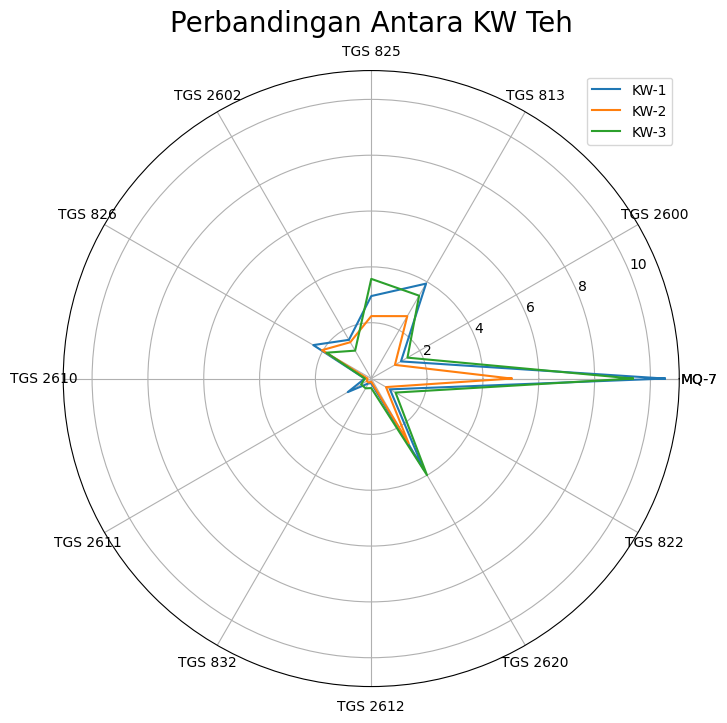

In [ ]:
categories = ["MQ-7","TGS 2600","TGS 813","TGS 825","TGS 2602","TGS 826","TGS 2610","TGS 2611","TGS 832","TGS 2612","TGS 2620","TGS 822"]
categories = [*categories, categories[0]]

th_kw1 = max1[0].values[:, 2:14].reshape(-1).tolist()
th_kw2 = max2[0].values[:, 2:14].reshape(-1).tolist()
th_kw3 = max3[0].values[:, 2:14].reshape(-1).tolist()

th_kw1 = [*th_kw1, th_kw1[0]]
th_kw2 = [*th_kw2, th_kw2[0]]
th_kw3 = [*th_kw3, th_kw3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(th_kw1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, th_kw1, label='KW-1')
plt.plot(label_loc, th_kw2, label='KW-2')
plt.plot(label_loc, th_kw3, label='KW-3')
plt.title('Perbandingan Antara KW Teh', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [ ]:
max1[0].values[:, 2:14].reshape(-1).tolist()

[10.512820512820513,
 1.2281553398058251,
 3.9268292682926824,
 2.955102040816327,
 1.6010638297872337,
 2.3979238754325265,
 0.23364485981308414,
 0.9714285714285714,
 0.19801980198019803,
 0.1710526315789475,
 3.768041237113402,
 0.7723880597014925]

In [ ]:
max2[0].values[:, 2:14].reshape(-1).tolist()

[5.020833333333333,
 0.979310344827586,
 2.5813953488372094,
 2.237410071942446,
 1.5026595744680848,
 2.035369774919614,
 0.13223140495867766,
 0.19158878504672908,
 0.16810344827586218,
 0.11363636363636363,
 2.682608695652174,
 0.6103202846975088]

In [ ]:
max3[0].values[:, 2:14].reshape(-1).tolist()

[9.368421052631579,
 1.4972826086956523,
 3.428571428571429,
 3.5707547169811322,
 1.1546840958605666,
 1.8530259365994235,
 0.22941176470588223,
 0.4192139737991267,
 0.4041666666666666,
 0.3405405405405406,
 3.994594594594595,
 1.0042462845010616]

In [ ]:
all_data = pd.DataFrame()
d1 = pd.concat(max1)
d2 = pd.concat(max2)
d3 = pd.concat(max3)
all_data = pd.concat([d1, d2, d3], ignore_index=True)

In [ ]:
all_data.describe()

,Tanggal,Waktu,MQ-7,TGS 2600,TGS 813,TGS 825,TGS 2602,TGS 826,TGS 2610,TGS 2611,TGS 832,TGS 2612,TGS 2620,TGS 822,Temperatur Ruang,Kelembapan Ruang,Temperatur Heater,State,Label
count,300,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300,300,300.000,300,300
unique,9,300,252.000000,299.000000,281.000000,300.000000,300.000000,299.000000,250.00000,254.000000,256.000000,236.000000,300.000000,299.000000,52,24,120.000,1,3
top,9/21/2015,9:02:20,0.521739,0.722348,0.367187,2.955102,1.601064,0.257143,0.17801,0.058252,0.008511,0.018182,3.768041,0.488536,NaN,0,-27.437,Purging,1
freq,70,1,9.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.00000,5.000000,4.000000,7.000000,1.000000,2.000000,120,170,120.000,300,100


In [ ]:
all_data = all_data.drop(columns=['Tanggal', 'Waktu','Temperatur Ruang',
                          'Kelembapan Ruang','Temperatur Heater', 'State'], axis=1)

In [ ]:
def scale_std2(dff):
    '''
    Rescale dengan std
    '''
    cols = ['MQ-7','TGS 2600','TGS 813','TGS 825','TGS 2602','TGS 826','TGS 2610','TGS 2611','TGS 832','TGS 2612','TGS 2620','TGS 822']
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(dff[cols])
    df_scaled = pd.DataFrame(scaled_data, columns=cols)
    df_scaled['Label'] = dff['Label']

    return df_scaled

all_rescale = scale_std2(all_data)

In [ ]:
train = all_data.sample(frac=0.7, random_state=0)
test = all_data.drop(train.index)

In [ ]:
train

,MQ-7,TGS 2600,TGS 813,TGS 825,TGS 2602,TGS 826,TGS 2610,TGS 2611,TGS 832,TGS 2612,TGS 2620,TGS 822,Label
208,3.269231,0.922717,1.751773,2.18797,0.786448,1.427762,0.19774,0.099291,0.266667,0.241379,2.613636,0.620561,3
188,0.521739,0.136076,0.234483,0.196185,0.144289,0.336391,0.128079,0.03653,0.0,0.017857,0.090909,0.243243,2
12,1.473684,1.155914,0.614286,1.436667,0.23126,0.974747,0.375527,0.107784,0.033816,0.018018,0.653061,1.897959,1
221,3.626667,0.756048,2.378882,1.662857,1.309406,1.967949,0.111111,0.181435,0.128571,0.100629,2.478599,0.527961,3
239,2.38806,0.600791,1.623377,1.394366,1.079602,1.444767,0.100775,0.026022,0.123596,0.082474,1.727891,0.423948,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.458333,0.141026,0.259259,0.132124,0.210402,0.354633,0.18617,0.049505,0.0,0.025,0.111842,0.211864,1
297,2.061538,0.506303,1.351852,0.912195,0.730769,1.083333,0.133333,0.029851,0.234043,0.1,1.663968,0.289216,3
141,5.576271,0.858974,2.610063,1.584699,1.798107,2.062914,0.185484,0.463054,0.334906,0.165644,2.911894,0.496564,2
207,3.358491,0.929907,1.814286,2.167286,0.767821,1.391061,0.184358,0.061644,0.264706,0.237864,2.575893,0.628037,3


In [ ]:
test

,MQ-7,TGS 2600,TGS 813,TGS 825,TGS 2602,TGS 826,TGS 2610,TGS 2611,TGS 832,TGS 2612,TGS 2620,TGS 822,Label
1,4.634921,0.957871,2.859259,2.114478,1.227273,1.864615,0.100917,0.144796,0.148837,0.08642,2.855895,0.625,1
6,2.755102,0.70852,1.671533,1.782143,0.828638,1.446875,0.100917,0.042056,0.134529,0.08125,2.241071,0.467487,1
9,2.541667,0.650442,1.492857,1.651408,0.749415,1.341693,0.090909,0.033019,0.138393,0.094937,2.129464,0.437063,1
11,1.578947,1.338798,0.684211,1.573333,0.281399,1.081013,0.394068,0.135802,0.044554,0.013514,0.750742,2.133333,1
17,1.052632,0.744792,0.485849,1.075908,0.166667,0.800512,0.286307,0.088757,0.018868,0.017857,0.425714,1.284264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2.5,0.632829,1.723404,1.60066,0.76247,1.423841,0.140351,0.051282,0.175966,0.134969,2.224215,0.413851,3
283,2.488095,0.612371,1.710059,1.150754,1.065217,1.469055,0.161538,0.065891,0.26749,0.114943,2.159184,0.355519,3
287,2.767442,0.62279,1.733696,1.161905,1.451104,1.798013,0.159091,0.212121,0.2625,0.135593,2.29249,0.375975,3
289,0.814815,0.248092,0.62963,0.632319,0.691589,0.962617,0.141791,0.003788,0.129412,0.111732,1.204633,0.176651,3


In [ ]:
def encode(train, test):
    """
    Encode label
    """
    label_encoder = LabelEncoder().fit(train.Label)
    labels = label_encoder.transform(train.Label)
    classes = list(label_encoder.classes_)
    train = train.drop(columns=['Label'], axis=1)
    #test = test.drop(columns=['Label'], axis=1)
    #train = train.drop(axis=1)
    #test = test.drop(axis=1)
    return train, labels, test, classes

In [ ]:
print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

train, labels, test, classes = encode(train, test)

No. of training examples: 210
No. of testing examples: 90


In [ ]:
train = train.values

timestamp = str(int(time.time()))

# split train data into train and validation, 5 folds
num_fold = 1

# test_size = 0.2 berarti data train sebanyak 20% digunakan validasi
sss = StratifiedShuffleSplit(n_splits=num_fold, test_size=0.2, random_state=0)

Fold ke-0
Jumlah Fitur:  12
Train Dim: (168, 1, 12)
Valid Dim: (42, 1, 12)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 2048)           26624     
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                             

2/2 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.81      1.00      0.90        13
           2       0.75      0.80      0.77        15

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.80        42



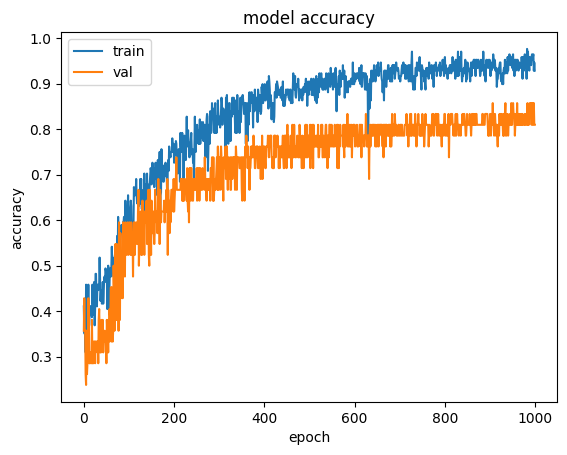

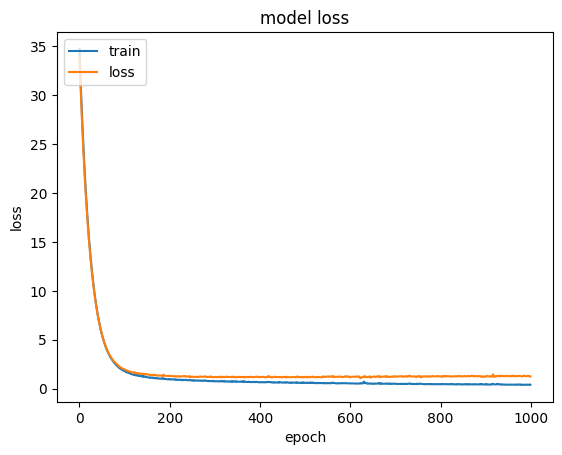

Model telah tersimpan dengan nama: model-fold-[[3.2037037  0.95359629 1.65467626 2.19117647 0.68508287 1.14285714
  0.15736041 0.03787879 0.21680217 0.25125628 2.32258065 0.64365672]]-1685506609.h5


In [ ]:
max_epochs = 1000

# adam parameter
learning_rate = 0.0001
epsilon = 1e-07

# start training and validation
for i, (train_index, valid_index) in enumerate(sss.split(train, labels)):
    print(f"Fold ke-{i}")
    X_train, X_valid = train[train_index], train[valid_index]
    y_train, y_valid = labels[train_index], labels[valid_index]

    nb_features = len(train[0])
    nb_class = len(classes)
    print("Jumlah Fitur: ",nb_features)

    # reshape train data
    X_train_r = np.zeros((len(X_train), 1, nb_features))
    for ind, i in enumerate(X_train_r): i[0]=X_train[ind]
    print("Train Dim:", X_train_r.shape)

    # reshape validation data
    X_valid_r = np.zeros((len(X_valid), 1, nb_features))
    for ind, i in enumerate(X_valid_r): i[0]=X_valid[ind]
    print("Valid Dim:", X_valid_r.shape)

    # Keras model with one Convolution1D layer
    model = Sequential()
    model.add(Convolution1D(filters=2048, kernel_size=1, activation='relu', input_shape=(1, nb_features)))
    model.add(Flatten())
    model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(3))
    model.add(Activation('softmax'))

    model.summary()

    y_train = np_utils.to_categorical(y_train, nb_class)
    y_valid = np_utils.to_categorical(y_valid, nb_class)

    #sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
    adam = Adam(learning_rate=learning_rate, epsilon=epsilon)

    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    #earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
    #                                        mode ="min", patience = 10,
    #                                        restore_best_weights = True)

    history = model.fit(X_train_r, y_train, epochs=max_epochs, validation_data=(X_valid_r, y_valid), batch_size=32)
    #history = model.fit(X_train_r, y_train, epochs=max_epochs, validation_data=(X_valid_r, y_valid), batch_size=16, callbacks = earlystopping
    preds = model.predict([X_valid_r])
    print(classification_report(y_valid.argmax(axis=1), preds.argmax(axis=1)))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'loss'], loc='upper left')
    plt.show()
    # simpan model
    model_name = f"model-fold-{i}-{timestamp}.h5"
    print(f"Model telah tersimpan dengan nama: {model_name}")
    model.save(model_name)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
label_encoder = LabelEncoder().fit(test.Label)
test_label = label_encoder.transform(test.Label)
test = test.drop(columns=['Label'])
test_data = test.values
test_data_r = np.zeros((len(test_data), 1, nb_features), dtype=np.float32)
for ind, i in enumerate(test_data_r):
  i[0] = test_data[ind]

In [ ]:
preds = model.predict(test_data_r)

3/3 [==============================] - 0s 18ms/step


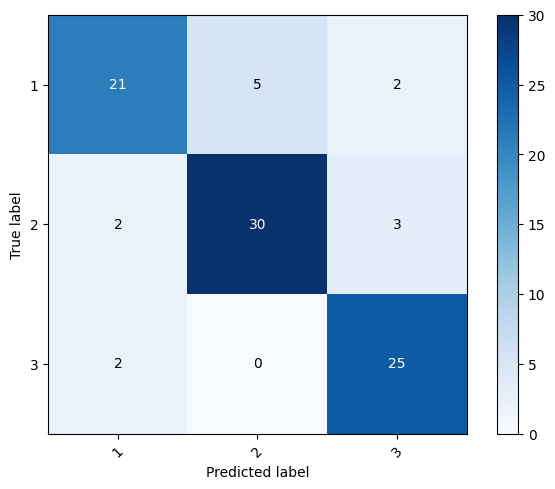

In [ ]:
plot_confusion_matrix(test_label, preds.argmax(axis=1), ['1','2','3'])

In [ ]:
print(classification_report(test_label, preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.86      0.86      0.86        35
           2       0.83      0.93      0.88        27

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90

